In [4]:
from collections import Counter
import numpy as np
import seaborn as sns
import pandas as pd
from nltk import ngrams
import nltk
#nltk.download('words')
import io
import spacy
nlp = spacy.load('en', disable=['parser'])

import matplotlib.pyplot as plt
%matplotlib inline



### Tokenize the text using NLTK and Spacy

In [6]:
def get_words_list_season(season):
    token_list = []
    with io.open(r'Friends/filtered_subtitles/s%s/s%s_all.txt' % (season, season), 'r', encoding='u8') as f:
        for line in f:
            zh, en = line.split('\b0\b1\b2---')
            doc = nlp(en)
            for token in doc:
                token_list.append(token)
    return token_list

def get_words_list_all():
    all_token_list = []
    season_list = [format(i, '02d') for i in range(1, 11)]     
    for season in season_list:
        token_list = get_words_list_season(season)
        all_token_list.extend(token_list)
    return all_token_list

# get_words_list_season('01')
all_token_list = get_words_list_all()

### sum up the numbers of vocabulary 

In [8]:

words_list = []
english_vocab = set(w.lower() for w in nltk.corpus.words.words())

for token in all_token_list:
    if token.is_punct == False and token.is_space == False and token.is_digit == False:

        if token.text.lower() in english_vocab:
            words_list.append(token.text.lower())



print('numbers of vocabulary in subtitle: %s'%len(set(words_list)))
#print(sorted(set(words_list)))
    

numbers of vocabulary in subtitle: 8796

### word count

In [1]:
topn = 20
cnt = Counter(words_list)
most_common = cnt.most_common(topn)
top_words = [each[0] for each in most_common]
topn_nums = [each[1] for each in most_common]
df = pd.DataFrame(dict(top_words=top_words, topn_nums=topn_nums))

y_pos = range(len(top_words))
fig, ax = plt.subplots()
ax.barh(y_pos, topn_nums, color='green', align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(top_words)
ax.invert_yaxis()
ax.set_xlabel('top n   n=%s' % topn)
ax.set_title("top %s link words in Friends"% topn, fontsize=14)

ax = sns.barplot(x="topn_nums", y="top_words", data=df)



NameError: name 'Counter' is not defined

### N-grams

In [73]:
def analyze_ngram(n, words_list):
    
    ngrams_result = ngrams(words_list, n)
    cnt = Counter(ngrams_result)
    key_to_del = []
    for k in cnt.keys():
        # remove the key where all the elements are the same. su
        s = set(k)
        if len(s) == 1:
            key_to_del.append(k)
    for key in key_to_del:
        del cnt[key]

    return cnt 

### drawing N-Gram plot by matplotlib
from the output result ,we can see that the most frequently phrase used in subtitle are "oh my god", "what are you doing", "I don't know" etc.

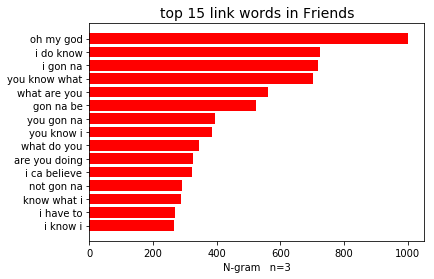

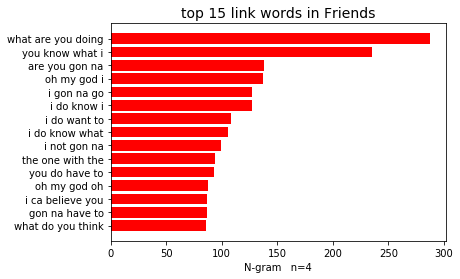

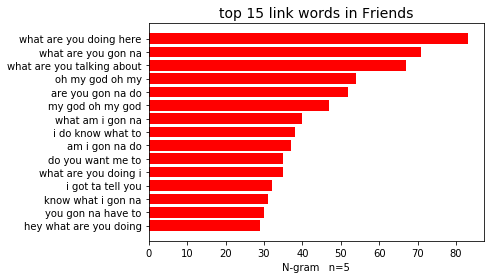

In [90]:

def plot_barh(N, top_n, words_list):
    cnt = analyze_ngram(N, words_list)
    topn_list = cnt.most_common(top_n)
    topn_link_tokens = [' '.join(x[0]) for x in topn_list]
    #print(topn_link_tokens)
    topn_num = [x[1] for x in topn_list]
    y_pos = range(len(topn_link_tokens))
    fig, ax = plt.subplots()
    ax.barh(y_pos, topn_num, color='red', align='center')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(topn_link_tokens)
    ax.invert_yaxis()
    ax.set_xlabel('N-gram   n=%s' % N)
    ax.set_title("top %s link words in Friends"% top_n, fontsize=14)


plot_barh(3, 15, words_list)
plot_barh(4, 15, words_list)
plot_barh(5, 15, words_list)
